# EEMP - Python Quiz

1. Import the following packages and alias them as we did before: 
    - *numpy, pandas, matplotlib, seaborn, statsmodels*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

2. Read in the employee dataset, we were using before, saving as *employee_data*.
    - Show the first 20 rows of the dataset. 
    - Before that, set the maximum number of columns to be displayed to 200 
        - Hint: pd.set_option('display.max_columns', #cols)

In [2]:
path_to_data = "https://raw.githubusercontent.com/armoutihansen/EEMP2021/main/datasets/Employee_data.csv"
employee_data=pd.read_csv(path_to_data)

pd.set_option('display.max_columns', 200)
employee_data.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


3. Create a new dataset consisting of only employees that work in the "Research & Development" department, saving it as *employee_data_RD*.
    - Print the shape, i.e. number of rows and columns, of this new dataset.
    - Check that all observations of employees in this dataset are indeed working in the R&D department.
        - Hint: using the *value_counts()* method is one way to check this.

In [3]:
employee_data_RD = employee_data[employee_data['Department']=="Research & Development"]

print(employee_data_RD.shape)

employee_data_RD.Department.value_counts()

(961, 35)


Research & Development    961
Name: Department, dtype: int64

4. Create a new variable *dummy_retained*, which indicates whether the employee is still with the employer.
    - Hint: Attrition == 'No

In [7]:
employee_data_RD['dummy_retained'] = 0
employee_data_RD.loc[(employee_data_RD['Attrition']=='No'),('dummy_retained')]=1

employee_data_RD.shape # check the new shape (+1 column)

/var/folders/qf/8khnlgmd1dv0rbj_p4gxv5jm0000gn/T/ipykernel_41434/3462826019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_data_RD['dummy_retained'] = 0


(961, 36)

5. Check the descriptive statistics of the *employee_data_RD* dataset.
    - What is the min, max and mean monthly income of employees within this dataset?
    - What is the mean job satisfaction and what is its standard deviation?
    - How many employees within this dataset have left their employer?

In [8]:
employee_data_RD.describe()

# Answer 1: min: 1009, max: 19999, mean: 6281
# Answer 2: mean: 2.73, std: 1.1 (range 1-4)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,dummy_retained
count,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,6281.252862,14284.865765,2.733611,15.291363,3.162331,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287,0.861602
std,9.178964,402.513333,8.122044,1.024293,0.0,602.681958,1.102567,20.249281,0.714435,1.152667,1.101620,4895.835087,7081.255126,2.502874,3.701129,0.368946,1.070640,0.0,0.857092,7.797326,1.314103,0.716964,6.024119,3.646045,3.200565,3.571031,0.345497
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,2.000000,1.0,460.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2741.000000,8007.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000
50%,36.000000,810.000000,7.000000,3.000000,1.0,1014.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4374.000000,14242.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,1.000000
75%,43.000000,1153.000000,14.000000,4.000000,1.0,1539.000000,4.000000,84.000000,3.000000,3.000000,4.000000,7655.000000,20284.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,1.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [9]:
employee_data_RD['dummy_retained'].value_counts() 

# Answer 3: 133 employees have left their employer

1    828
0    133
Name: dummy_retained, dtype: int64

4. Visualize
    - The distribution of job satisfaction within the dataset.
    - The distribution of job satisfaction within the dataset, separately for those who work overtime and thos who do not
        - Hint: *OverTime == 'Yes"*
    - The correlation between job satisfaction and monthly income (also including a regression line).

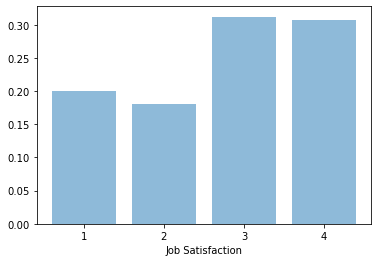

In [11]:
# Distribution of job satisfaction
# with matplotlib
plt.hist(employee_data_RD['JobSatisfaction'],bins=[0.5,1.5,2.5,3.5,4.5], rwidth = 0.8, align='mid', density=True, alpha=0.5)
plt.xlabel('Job Satisfaction')
plt.xticks([1,2,3,4]);

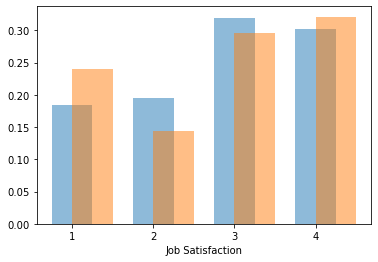

In [18]:
# Distribution of job satisfaction, separately with/without overtime
# with matplotlib
plt.hist(employee_data_RD.loc[employee_data_RD['OverTime']=='No','JobSatisfaction'],bins=[0.5,1.5,2.5,3.5,4.5], rwidth = 0.5, align='mid', density=True, alpha=0.5)
plt.hist(employee_data_RD.loc[employee_data_RD['OverTime']=='Yes','JobSatisfaction'],bins=[0.75,1.75,2.75,3.75,4.75], rwidth = 0.5, align='mid', density=True, alpha=0.5)
plt.xlabel('Job Satisfaction')
plt.xticks([1,2,3,4]);

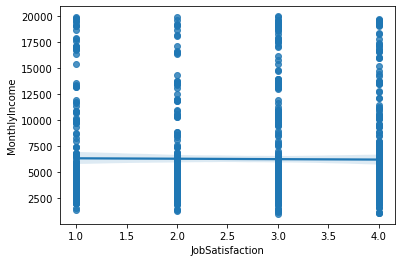

In [21]:
# Correlation job satisfaction and monthly income

sns.regplot(x='JobSatisfaction',y='MonthlyIncome',data=employee_data_RD);

5. Run a regression with your new variable *dummy_retained* as the response variable and your choice of potentially meaningful input variables (e.g. monthly income, overtime, job satisfaction etc.) to predict whether an employee will stay with her employer.
    - Hint: Use *smf.logit()* as the response variable is discrete.

In [22]:
# Logit regression to predict whether an employee stays
results_logit = smf.logit('dummy_retained ~ MonthlyIncome + C(JobSatisfaction) + C(WorkLifeBalance) + C(OverTime) + TrainingTimesLastYear + C(MaritalStatus) + C(Gender)', data = employee_data_RD).fit()

print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.323076
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         dummy_retained   No. Observations:                  961
Model:                          Logit   Df Residuals:                      948
Method:                           MLE   Df Model:                           12
Date:                Sun, 10 Oct 2021   Pseudo R-squ.:                  0.1964
Time:                        18:10:21   Log-Likelihood:                -310.48
converged:                       True   LL-Null:                       -386.36
Covariance Type:            nonrobust   LLR p-value:                 2.473e-26
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.6150      0.535      1.150      0.250   